# Tutorial from https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
## They make your workflow much easier to read and understand.
## They enforce the implementation and order of steps in your project.
## These in turn make your work much more reproducible.

In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
import pandas as pd
import numpy as np
train = pd.read_csv('../data/train_loan.csv')
test = pd.read_csv('../data/test_loan.csv')
train = train.drop('Loan_ID', axis=1)
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
train.describe(include=[object])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [18]:
train.loc[:,train.dtypes == object].equals(
    train.select_dtypes(include=['object']))

True

In [13]:
train.select_dtypes(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [5]:
for x in train.loc[:,train.dtypes == object]:
    print(f"{x} = {train[x].unique()} with {train[x].isnull().sum()} NaN")

Gender = ['Male' 'Female' nan] with 13 NaN
Married = ['No' 'Yes' nan] with 3 NaN
Dependents = ['0' '1' '2' '3+' nan] with 15 NaN
Education = ['Graduate' 'Not Graduate'] with 0 NaN
Self_Employed = ['No' 'Yes' nan] with 32 NaN
Property_Area = ['Urban' 'Rural' 'Semiurban'] with 0 NaN
Loan_Status = ['Y' 'N'] with 0 NaN


In [6]:
train.describe(include=[np.number])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(array([422.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

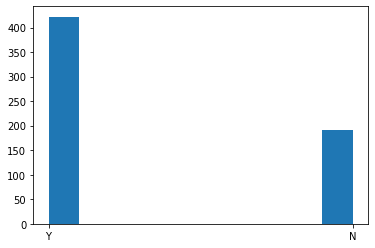

In [6]:
import matplotlib.pyplot as plt
plt.hist(y)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [20]:
### this is index!
train.select_dtypes(include=['int64', 'float64']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [27]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
##transformers=['name',transformer]

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [32]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.780
SVC(C=0.025, probability=True)
model score: 0.715
NuSVC(probability=True)
model score: 0.829
DecisionTreeClassifier()
model score: 0.642
RandomForestClassifier()
model score: 0.789
AdaBoostClassifier()
model score: 0.789
GradientBoostingClassifier()
model score: 0.780
LinearDiscriminantAnalysis()
model score: 0.829


In [36]:
param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__max_features': 'log2', 'classifier__n_estimators': 200}
0.8065141207998352


In [ ]:
### modules
%%capture
%run read_data.ipynb 

In [ ]:
numeric_transformer = Pipeline(steps=[('impute',imputer_numeric()),('scaler',scaler_numeric)])
cate...

numeric_feature, categorical_feature = pd.select_dtypes(include=[np.number])
,pd.select_dtypes(include=['object'])

Transformer = ColumnTransformer(Transformer = [('numeric',numeric_transformer,
            numeric_feature),('categorical',categorical_transformer)])

model = Pipeline(steps=[('preprocessing',transformer),('model',randomForest)])

model.fit(X_train,Y_train)
model.predict(X_test)

In [10]:
a = np.random.randn(100)
b = np.random.randn(100)
np.cov(a,b)

array([0.82253069, 0.75934211])